#PROYECTO INTELIGENCIA ARTIFICIAL
Santiago Quintana




#### Información del database

1. Date - Fehca del accidente
2. Time - Hora del accidente
3. Location - Lugar del accidente
4. Operator - Airolinea
5. Flight - Numero vuelo
6. Route - Ruta del avión
7. Type - Tipo del vuelo
8. Registration -  Identificación
9. cn/In - Numero de serie / Numero de fuselaje
10. Aboard - Numero de personas a bordo
11. Fatalities - Muertes, resultado total
12. Ground - Total de personas muertas a causa del choque
13. Summary - Resumen del caso




# Librerias

In [78]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
import scipy.stats as stats
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.colors as colors
%matplotlib inline

import plotly.offline as py

py.init_notebook_mode(connected=True)


### Importación databse

In [79]:
datab = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
print("Tamaño de database:", datab.shape)

Tamaño de database: (5268, 13)


### Información del database

In [80]:
datab.head(10)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


In [81]:
datab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [82]:
datab.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [83]:
# Sumatoria de la suma de valores nulos
datab.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

# Limpieza de datos

In [84]:
datab_first = datab.copy()
#Reemplazo de valores
datab['Time'] = datab['Time'].replace(np.nan, '00:00') ####
datab['Time'] = datab['Time'].str.replace('c: ', '')
datab['Time'] = datab ['Time'].str.replace('c:', '')
datab['Time'] = datab ['Time'].str.replace('c', '')
datab['Time'] = datab ['Time'].str.replace('12\'20', '12:20')
datab['Time'] = datab ['Time'].str.replace('18.40', '18:40')
datab['Time'] = datab ['Time'].str.replace('0943', '09:43')
datab['Time'] = datab ['Time'].str.replace('22\'08', '22:08')
datab['Time'] = datab ['Time'].str.replace('114:20', '00:00')

datab.Operator = datab.Operator.str.upper() #Genera el cambio 
operator = datab[['Operator','Fatalities']].groupby('Operator').agg(['sum','count'])

In [85]:
# Se cambia el formato de hora por fecha y hora
time = pd.to_datetime(datab['Time'], format='%H:%M')
datab['hour'] = time.dt.hour
datab['Year'] = datab['Date'].apply(lambda x: int(str(x)[-4:]))


In [86]:
#Sobrevivientes
datab['Survived'] = datab['Aboard'] - datab['Fatalities'] - datab['Ground']
datab['Has_Survivors'] = 1
datab.loc[datab['Survived'] == 0, 'Has_Survivors'] = 0

### Muertes y accidentes

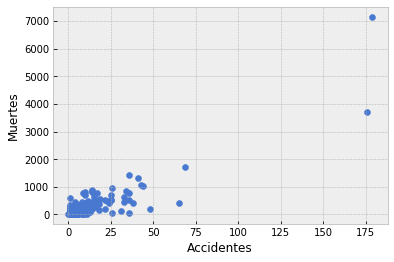

In [87]:
datab['Fatalities'] = datab['Fatalities'].fillna(0)
X = operator['Fatalities','count']
Y = operator['Fatalities','sum']
plt.scatter(X, Y,label='Operators')
plt.ylabel('Muertes')
plt.xlabel('Accidentes');

### Porcentaje de muertes

In [88]:
datab_first['porcentaje_muertes'] = datab['Fatalities'] / datab['Aboard']
print(datab_first['porcentaje_muertes'].head(5))

0    0.5
1    1.0
2    1.0
3    0.7
4    1.0
Name: porcentaje_muertes, dtype: float64


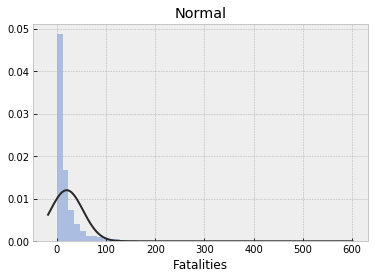

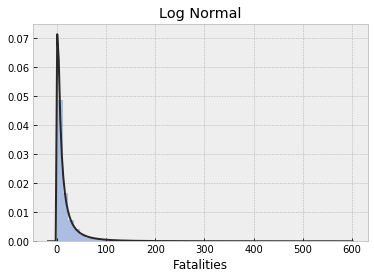

In [89]:
y = datab['Fatalities']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

In [90]:
datab["log_Fatalities"] = np.log1p(datab["Fatalities"])

In [91]:
datab.head(10)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,hour,Year,Survived,Has_Survivors,log_Fatalities
0,09/17/1908,17:18,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",17,1908,1.0,1,0.693147
1,07/12/1912,06:30,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,6,1912,0.0,0,1.791759
2,08/06/1913,00:00,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0,1913,0.0,0,0.693147
3,09/09/1913,18:30,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,18,1913,6.0,1,2.708050
4,10/17/1913,10:30,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,10,1913,0.0,0,3.433987
5,03/05/1915,01:00,"Tienen, Belgium",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...,1,1915,20.0,1,3.091042
6,09/03/1915,15:20,"Off Cuxhaven, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when...",15,1915,0.0,0,2.995732
7,07/28/1916,00:00,"Near Jambol, Bulgeria",MILITARY - GERMAN ARMY,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown.",0,1916,0.0,0,3.044522
8,09/24/1916,01:00,"Billericay, England",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.,1,1916,0.0,0,3.135494
9,10/01/1916,23:45,"Potters Bar, England",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...,23,1916,0.0,0,2.995732


# Visualización de los datos

### Correlación entre variables

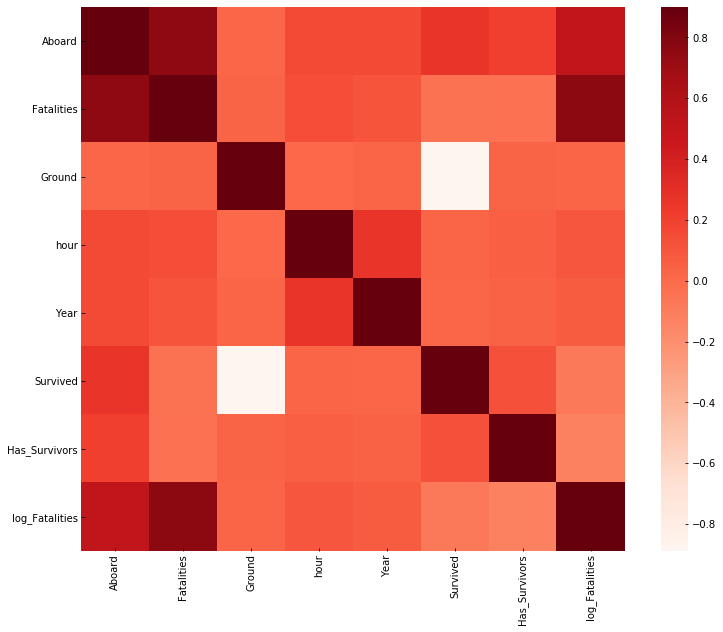

In [92]:
corr = datab.corr()
plt.subplots(figsize=(13,10))
sns.heatmap(corr, vmax=0.9, cmap="Reds", square=True)

### Muertes por año y accidente por año

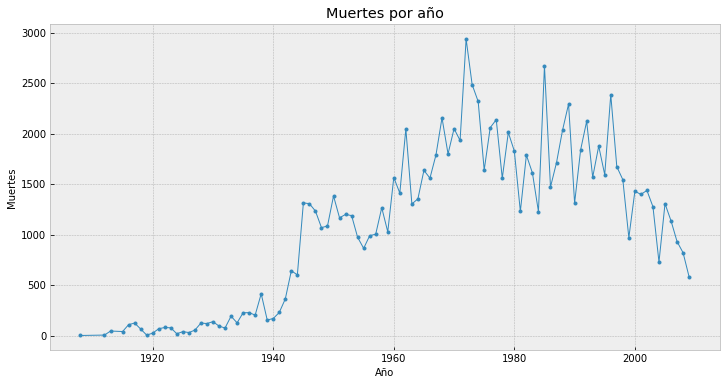

In [93]:
yearly = datab[['Year','Fatalities']].groupby('Year').agg(['sum','count'])
plt.style.use('bmh')
plt.figure(figsize=(12,6))
yearly['Fatalities','sum'].plot(title='Muertes por año',marker = ".", linewidth=1)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Muertes', fontsize=10)
plt.show()


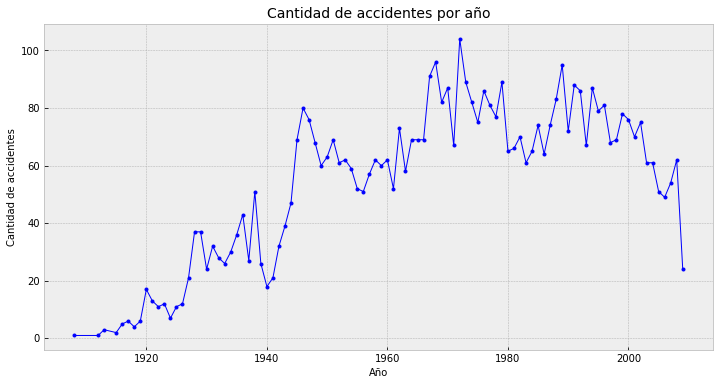

In [94]:
from datetime import date, timedelta, datetime
datab_first['Time1'] = datab['Date'] + ' ' + datab['Time'] #Union entre las columnas
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
datab_first['Time1'] = datab_first['Time1'].apply(todate) #Conversión de la fecha

Temp = datab_first.groupby(datab_first.Time1.dt.year)[['Date']].count() 
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Cantidad de accidentes', fontsize=10)
plt.title('Cantidad de accidentes por año', loc='Center', fontsize=14)
plt.show()


70s and 80s are among the worst years for airline industry. 1972 is the worst so far, causing maximum no. of fatalities.

###  Grafica de barras, accidentes por mes, dia de la semana y hora

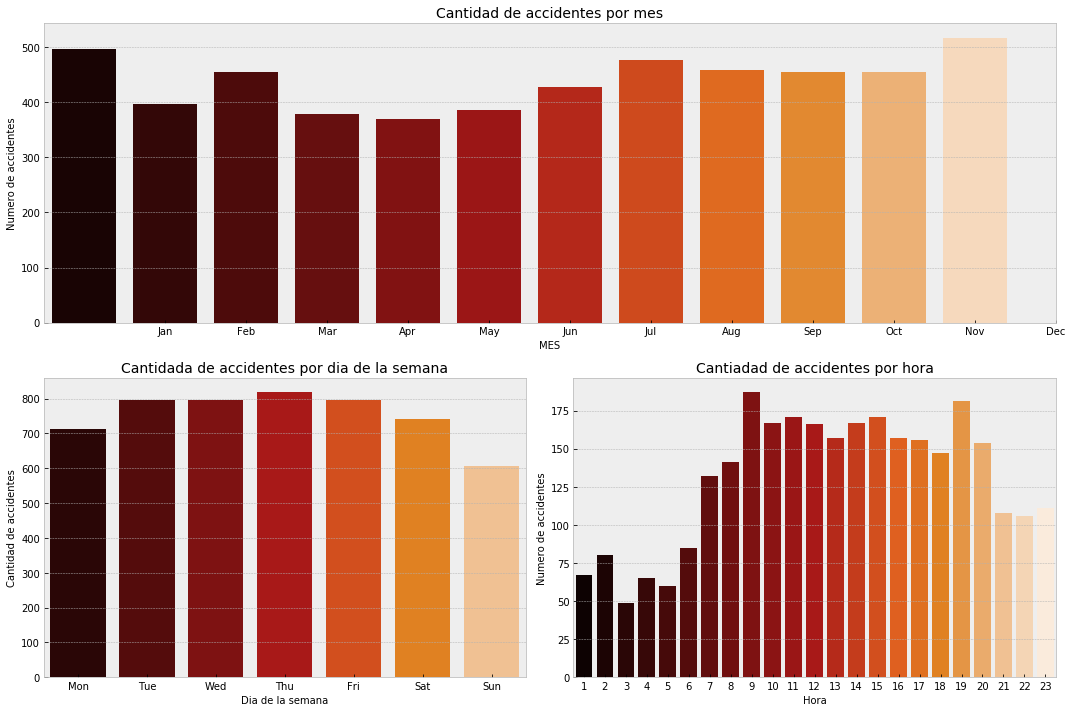

In [95]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import requests

gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(15,10))
plt.style.use('seaborn-muted')
ax = pl.subplot(gs[0, :]) # row 0, col 0
sns.barplot(datab_first.groupby(datab_first.Time1.dt.month)[['Date']].count().index, 'Date', data= datab_first.groupby(datab_first.Time1.dt.month)[['Date']].count(), palette="gist_heat", linewidth=2)
plt.xticks(datab_first.groupby(datab_first.Time1.dt.month)[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('MES', fontsize=10)
plt.ylabel('Numero de accidentes', fontsize=10)
plt.title('Cantidad de accidentes por mes', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 0])
sns.barplot(datab_first.groupby(datab_first.Time1.dt.weekday)[['Date']].count().index, 'Date', data=datab_first.groupby(datab_first.Time1.dt.weekday)[['Date']].count(), palette="gist_heat", linewidth=2)
plt.xticks(datab_first.groupby(datab_first.Time1.dt.weekday)[['Date']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Dia de la semana', fontsize=10)
plt.ylabel('Cantidad de accidentes', fontsize=10)
plt.title('Cantidada de accidentes por dia de la semana', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 1])
sns.barplot(datab_first[datab_first.Time1.dt.hour != 0].groupby(datab_first.Time1.dt.hour)[['Date']].count().index, 'Date', data=datab_first[datab_first.Time1.dt.hour != 0].groupby(datab_first.Time1.dt.hour)[['Date']].count(),palette="gist_heat", linewidth=2)
plt.xlabel('Hora', fontsize=10)
plt.ylabel('Numero de accidentes', fontsize=10)
plt.title('Cantiadad de accidentes por hora', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()


###  Ubicación accidentes

### Total de sobrevivientes por arolinea

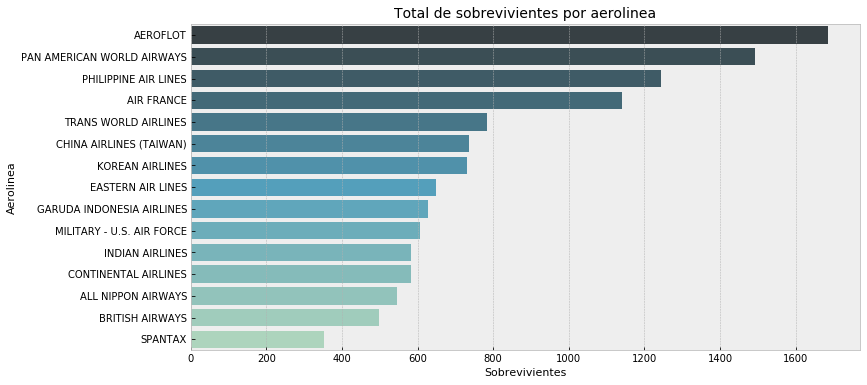

In [96]:
datab1 = datab.groupby('Operator')[['Survived']].sum()
datab1 = datab1.rename(columns={"Operator": "Survived"})
datab1 = datab1.sort_values(by='Survived', ascending=False)
Prop_by_OpTOP = datab1.head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=Prop_by_OpTOP.index, x="Survived", data=Prop_by_OpTOP, palette="GnBu_d", orient='h')
plt.xlabel('Sobrevivientes', fontsize=11)
plt.ylabel('Aerolinea', fontsize=11)
plt.title('Total de sobrevivientes por aerolinea', loc='Center', fontsize=14)
plt.show()

### Muertes y accidentes de las peores 5 aerolineas

In [97]:
accidents = operator['Fatalities','count'].sort_values(ascending=False)
interestingOps = accidents.index.values.tolist()[0:5]
optrend = train[['Operator','Year','Fatalities']].groupby(['Operator','Year']).agg(['sum','count'])
ops = optrend['Fatalities'].reset_index()
fig,axtrend = plt.subplots(2,1)
for op in interestingOps:
    ops[ops['Operator']==op].plot(x='Year',y='sum',ax=axtrend[0],grid=True,linewidth=2)
    ops[ops['Operator']==op].plot(x='Year',y='count',ax=axtrend[1],grid=True,linewidth=2)

axtrend[0].set_title('Tendencia de muertes por aerolinea')
axtrend[1].set_title('Tendencia de accidente por aerolinea')
linesF, labelsF = axtrend[0].get_legend_handles_labels()
linesA, labelsA = axtrend[1].get_legend_handles_labels()
axtrend[0].legend(linesF,interestingOps)
axtrend[1].legend(linesA,interestingOps)
plt.tight_layout()

NameError: name 'train' is not defined

Aeroflot tiene la mayor cantidad de accidentes de todo el tiempo según el databse. PJSC Aeroflot - Russian Airlines, o Aeroflot, es la aerolínea más grande de la Federación de Rusia.

### Gráfico de barras del porcentaje de suma de muertes con los peores tipos de plano

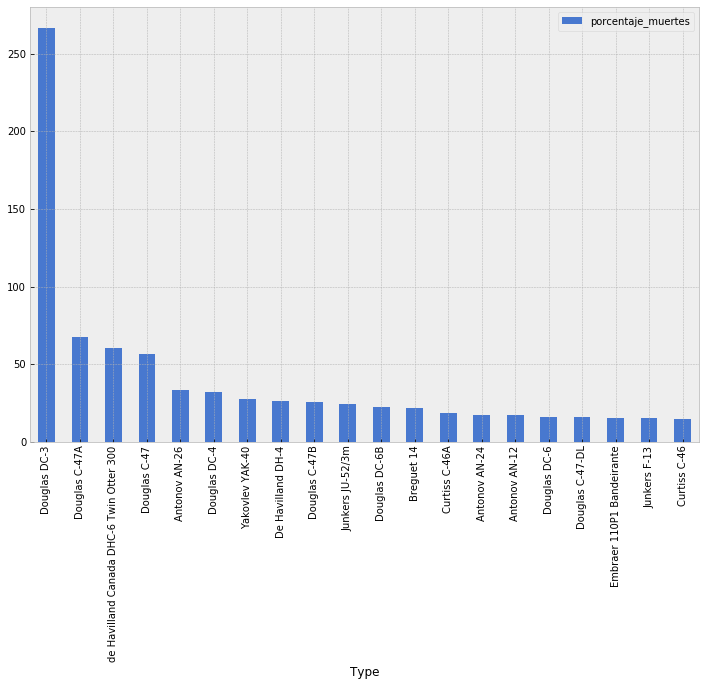

In [ ]:
datab_first.groupby(['Tipo']).agg({'porcentaje_muertes':'sum'}).sort_values(by='porcentaje_muertes',ascending=False).head(20).plot.bar()

### Top 10 de los lugares mas peligrosos

In [ ]:
from collections import Counter
loc_list = Counter(datab['Location'].dropna()).most_common(10)
locs = []
crashes = []
for loc in loc_list:
    locs.append(loc[0])
    crashes.append(loc[1])
pd.DataFrame({'Accidentes por locación' : crashes}, index=locs)

,Crashes in this location
"Sao Paulo, Brazil",15
"Moscow, Russia",15
"Rio de Janeiro, Brazil",14
"Bogota, Colombia",13
"Manila, Philippines",13
"Anchorage, Alaska",13
"New York, New York",12
"Cairo, Egypt",12
"Chicago, Illinois",11
"Near Moscow, Russia",9


 # Clustering con K-Medias

### Importación de modulos

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score, silhouette_samples
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
text_data = datab['Summary'].dropna()
text_data = pd.DataFrame(text_data)

### TF-IDF 

KMedias extracción para conversión a numeros

TF-IDF implementa una estadística numérica. Esta estadística utiliza frecuencia de términos y frecuencia de documentos inversa. El método TfidfVectorizer () implementa el algoritmo TF-IDF.

In [ ]:
documents = list(text_data['Summary'])
vectorizer = TfidfVectorizer(stop_words='english') # Stop words are like "a", "the", or "in" which don't have significant meaning
X = vectorizer.fit_transform(documents)

### Ajustes del modelo

El modelo, para este se implemento k medias con 7 clusteres

In [ ]:
random_state = 0 
model = MiniBatchKMeans(n_clusters=7, random_state=random_state)
model.fit(X)
cluster_labels = model.labels_
sample_silhouette_values = silhouette_samples(X, cluster_labels)


In [ ]:
print ('Términos más comunes por grupo:')


means_lst = []
order_centroids = model.cluster_centers_.argsort()[:,::-1] 
terms = vectorizer.get_feature_names()
sample_silhouette_values = silhouette_samples(X, cluster_labels)

for i in range(7):
    means_lst.append(sample_silhouette_values[cluster_labels == i].mean())
    print("\n")
    print('Cluster %d:' % i)
    for j in order_centroids[i, :10]: 
        print ('%s' % terms[j]),
    print

print("\n")
print("Coeficiente de Silueta: ")
print(means_lst)

Términos más comunes por grupo:


Cluster 0:
mountain
cargo
plane
crashed
struck
poor
flew
attempting
weather
land


Cluster 1:
attempting
land
landing
crashed
shot
aircraft
air
struck
plane
midair


Cluster 2:
en
route
crashed
disappeared
mountain
plane
cargo
weather
aircraft
flight


Cluster 3:
crashed
aircraft
flight
taking
pilot
plane
weather
shortly
conditions
sea


Cluster 4:
engine
takeoff
failure
crashed
plane
aircraft
shortly
failed
lost
power


Cluster 5:
cause
undetermined
unknown
crashed
probable
sea
miles
taking
disappeared
aircraft


Cluster 6:
approach
runway
short
crashed
aircraft
crew
pilot
landing
ground
plane


Coeficiente de Silueta: 
[0.041288396248249454, 0.0016363754768339452, 0.1224087165987328, -0.00870695364686591, 0.03567662533078994, 0.06436147942249576, 0.014032054239770494]


### Visualización

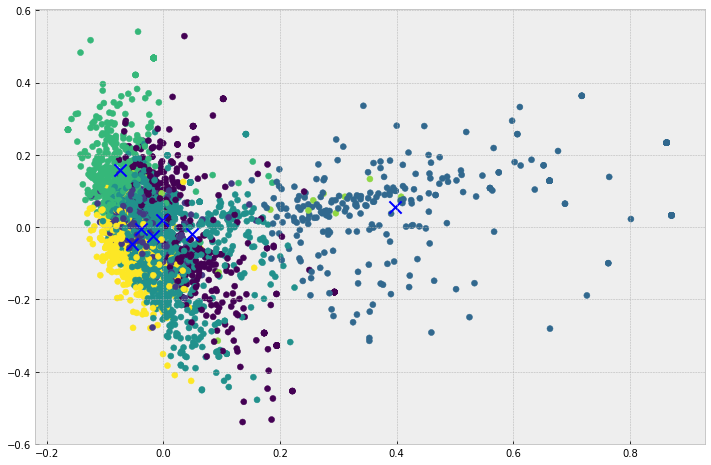

In [ ]:
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(X.toarray())

reduced_cluster_centers = pca.transform(model.cluster_centers_)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')